In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Front.xlsx to Front.xlsx


In [3]:
df = pd.read_excel("Front.xlsx")
df.head()

,S.No.,Student,Attempt Submission Time,Grades,Exam duration (Sec)
0,1,MUHAMMED FAIES,"Dec. 29, 2021, 11:16 a.m.",93.33,390
1,2,Sai Akshay,"Dec. 29, 2021, 9:09 a.m.",80.00,726
2,3,MUHAMMED NA,"Dec. 29, 2021, 4:55 a.m.",80.00,666
3,4,VINAYAK K,"Dec. 29, 2021, 4:03 a.m.",46.67,478
4,5,ANJALI ARORA,"Dec. 28, 2021, 5:09 p.m.",80.00,946


In [4]:
del df['Student']
del df['S.No.']
del df['Attempt Submission Time']

In [5]:
## pre-processing the data

# scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# converting the numpy array into a pandas DataFrame
norm_df = pd.DataFrame(scaled_df)

In [6]:
norm_df.head()

,0,1
0,0.815786,-1.064618
1,-0.113582,-0.210891
2,-0.113582,-0.363342
3,-2.437348,-0.841023
4,-0.113582,0.348097


In [7]:
norm_df.rename(columns = {0:'grade', 1:'exam_dur'}, inplace = True)

In [21]:
model1 = EllipticEnvelope(contamination = 0.3) # changing contamination will affect how many data points are considered outliers.
model1.fit(norm_df)
pred = model1.predict(norm_df)
norm_df['pred'] = pred

In [22]:
norm_df.head()

,grade,exam_dur,pred
0,0.815786,-1.064618,1
1,-0.113582,-0.210891,1
2,-0.113582,-0.363342,1
3,-2.437348,-0.841023,-1
4,-0.113582,0.348097,1


<Axes: xlabel='grade', ylabel='exam_dur'>

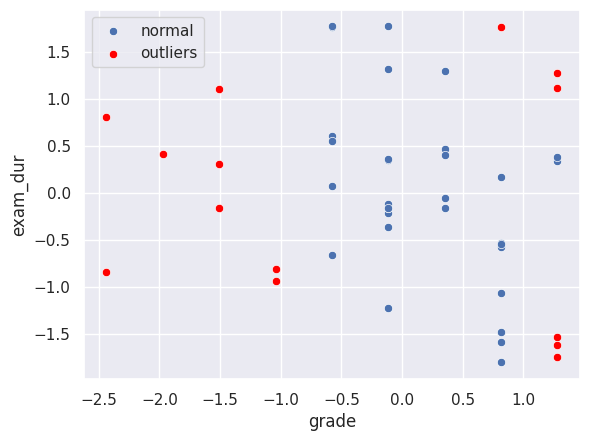

In [23]:
df1 = norm_df[norm_df.pred==1]
df2 = norm_df[norm_df.pred==-1]

sns.set_theme()
sns.scatterplot(x=df1['grade'],y=df1['exam_dur'],label='normal')
sns.scatterplot(x=df2['grade'],y=df2['exam_dur'],color='red',label='outliers')